### **此.ipynb檔主要為對原始資料做可視化觀察與進行轉換**

* 先運行`convert_mat_to_csv_all.py`將UPB資料集的.mat轉換為csv檔案
* 取工況Operating Parameter為：N09_M07_F10

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### **轉換所有指定資料夾下的csv檔為numpy矩陣以便查看**

In [38]:
# 轉換所有指定資料夾下的csv檔為numpy矩陣以便查看
# folder_names = ['K002', 'KA01', 'KA05', 'KA07', 'KI01', 'KI05', 'KI07']  # 訓練資料夾
folder_names = ['K001', 'KA22', 'KA04', 'KI14', 'KI21']  # 測試資料夾

operating_parameter = 'N09_M07_F10'  # 指定工況
folder_indexes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 
                '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']

data_index = 0

for folder_name in folder_names:
    for folder_index in folder_indexes:
        csv_file_path = os.path.join(folder_name, f'{operating_parameter}_{folder_name}_{folder_index}', 
                                     f'{operating_parameter}_{folder_name}_{folder_index}_current_vib.csv')
        # print(csv_file_path)
        df = pd.read_csv(csv_file_path)

        # 轉換為numpy數組
        X_data_array = df.to_numpy()
        # print(X_data_array.shape)

        # 只取振動訊號
        X_data_array = X_data_array[:, 2]

        # 減去後面幾個row以達到250000筆
        n_keep = 250000
        X_data_array = X_data_array[:n_keep]  # (250000,)

        # 變為2維陣列以方便堆疊
        X_data_array = np.expand_dims(X_data_array, axis=0)  # (1, 250000)
        # print(X_data_array.shape)

        # 堆疊成為大陣列
        if data_index == 0:
            X_data_array_stack = np.copy(X_data_array)

        else:
            X_data_array_stack = np.concatenate((X_data_array_stack, X_data_array), axis=0)

        # print("X_data_array_stack.shape: ", X_data_array_stack.shape)

        print("data_index {}({}) processed.".format(data_index, csv_file_path))

        data_index += 1

data_index 0(KB23\N09_M07_F10_KB23_1\N09_M07_F10_KB23_1_current_vib.csv) processed.
data_index 1(KB23\N09_M07_F10_KB23_2\N09_M07_F10_KB23_2_current_vib.csv) processed.
data_index 2(KB23\N09_M07_F10_KB23_3\N09_M07_F10_KB23_3_current_vib.csv) processed.
data_index 3(KB23\N09_M07_F10_KB23_4\N09_M07_F10_KB23_4_current_vib.csv) processed.
data_index 4(KB23\N09_M07_F10_KB23_5\N09_M07_F10_KB23_5_current_vib.csv) processed.
data_index 5(KB23\N09_M07_F10_KB23_6\N09_M07_F10_KB23_6_current_vib.csv) processed.
data_index 6(KB23\N09_M07_F10_KB23_7\N09_M07_F10_KB23_7_current_vib.csv) processed.
data_index 7(KB23\N09_M07_F10_KB23_8\N09_M07_F10_KB23_8_current_vib.csv) processed.
data_index 8(KB23\N09_M07_F10_KB23_9\N09_M07_F10_KB23_9_current_vib.csv) processed.
data_index 9(KB23\N09_M07_F10_KB23_10\N09_M07_F10_KB23_10_current_vib.csv) processed.
data_index 10(KB23\N09_M07_F10_KB23_11\N09_M07_F10_KB23_11_current_vib.csv) processed.
data_index 11(KB23\N09_M07_F10_KB23_12\N09_M07_F10_KB23_12_current_vib.

### **一、UPB資料集振動訊號的原始波型**

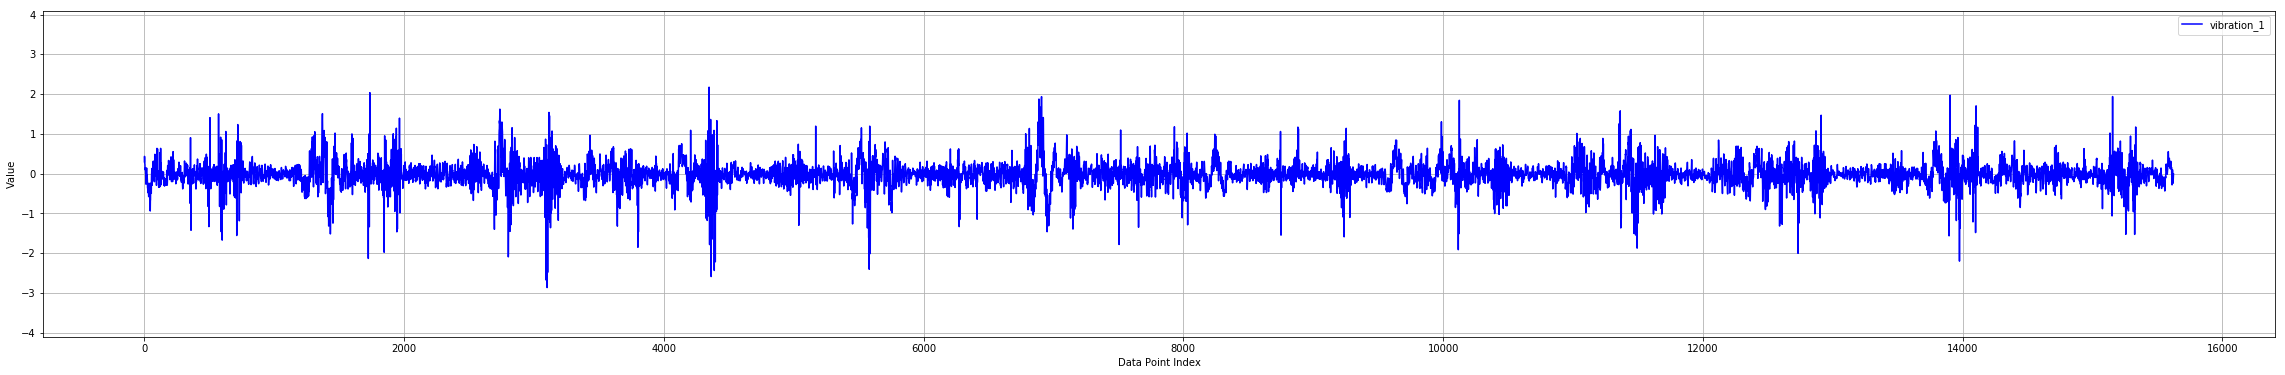

In [39]:
# 繪製資料分布
dataset_index = 0  # 根據上面輸出結果的dataset_index來指定想要觀察的數據集
data = X_data_array_stack[dataset_index, 125000:140625]  # 聚焦在2~2.25秒

# Create a smooth line chart for the 3-axis data
plt.figure(figsize=(40, 6))
plt.plot(data, color='b', label='vibration_1')
# plt.title('Vib Signal')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.ylim(-4.1, 4.1)
plt.legend()
plt.grid(True)
plt.show()

### **二、UPB資料集振動訊號的轉換波型**

In [40]:
# 方法：使用FFT轉換
X_fft = np.zeros((140, 15625), dtype=np.complex)  # 初始化一個空陣列來儲存FFT結果，注意FFT結果的大小與原數據相同

X_fft = np.fft.fft(data)

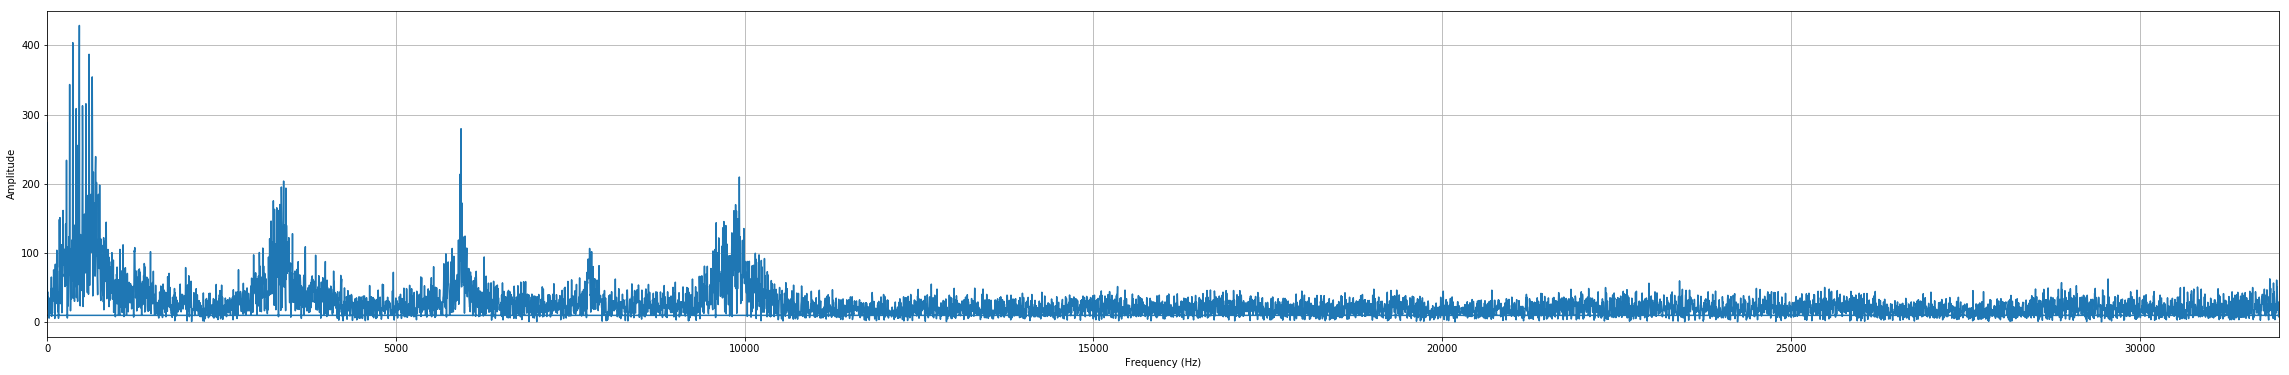

In [41]:
# 原始數據的採樣率，單位是Hz
sampling_rate = 64000

# 計算頻率軸的值
N = X_fft.shape[0]  # 數據點的數量
freq = np.fft.fftfreq(N, d=1/sampling_rate)

# 計算選定數據和軸的FFT結果的幅度
magnitude = np.abs(X_fft)

# 繪製頻率與振幅的關係圖
plt.figure(figsize=(40, 6))
plt.plot(freq, magnitude)
# plt.title('Frequency vs Amplitude')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([0, sampling_rate / 2])  # 通常只顯示到Nyquist頻率
plt.grid(True)
plt.show()